# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [3]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

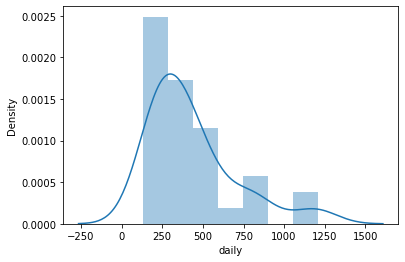

In [4]:
import seaborn as sns
sns.distplot(data['daily'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

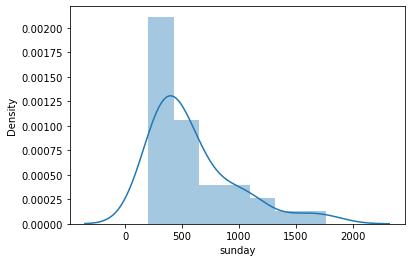

In [5]:
import seaborn as sns
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [6]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

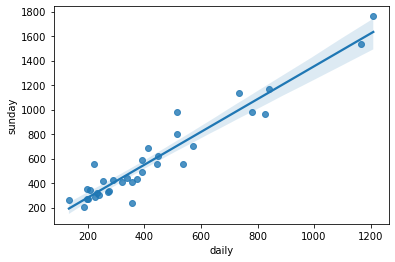

In [7]:
sns.regplot(x="daily", y="sunday", data=data);

In [8]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [11]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [12]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [13]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64